DEEP LEARNING IMAGE CLASSIFICTION

In [ ]:
#Setting google drive as a directory for dataset
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

#Reading dataset
import pandas as pd 
fashion_train_df = pd.read_csv('gdrive/My Drive/deepLearning Assign/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('gdrive/My Drive/deepLearning Assign/fashion-mnist_test.csv', sep = ',')

In [ ]:
fashion_test_df.isnull().sum().sum()

0

In [ ]:
fashion_train_df.isnull().sum().sum()

0

In [ ]:
sum(n >256 or n<0 for n in fashion_train_df.values.flatten())

0

In [ ]:
sum(n >256 or n<0 for n in fashion_test_df.values.flatten())

0

In [ ]:
#Importing other required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
sns.set_style("whitegrid")

In [ ]:
#Shape of training data
fashion_train_df.shape

(60000, 785)

In [ ]:
#Shape of test data
fashion_test_df.shape

(10000, 785)

In [ ]:
# Create training and testing arrays
train = np.array(fashion_train_df, dtype = 'float32')
test = np.array(fashion_test_df, dtype='float32')

0.0

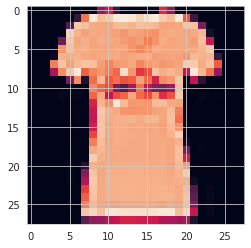

In [ ]:
import random
i=random.randint(1,60000)
plt.imshow(train[i,1:].reshape(28,28))
label=train[i,0]
label

#view of images in grid format

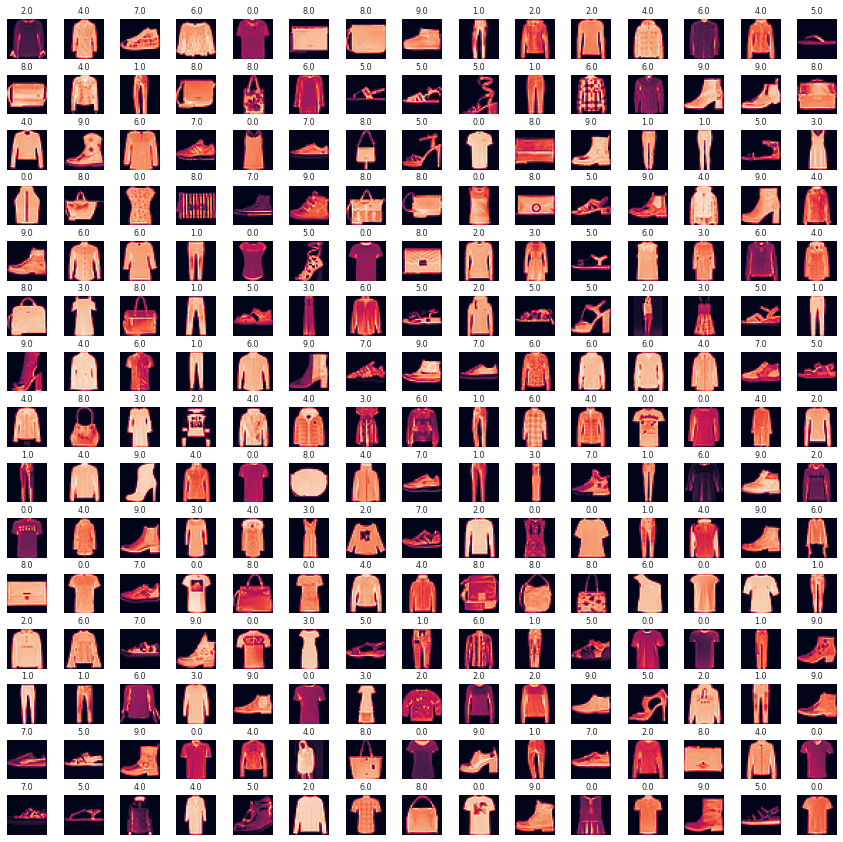

In [ ]:

# Define the dimensions of the plot grid 
w_grid=15
l_grid=15


fig,axes=plt.subplots(l_grid,w_grid,figsize=(15,15))

axes = axes.ravel() # flatten thr 15 X 15 matrix into 225 array 

n_training = len(train) # get the length of the training dataset

for i in np.arange(0,w_grid*l_grid): #create evenly spaces variables
    #select a random number
    
    index = np.random.randint(0,n_training)
    # read and disply and images with the selectd index
    axes[i].imshow(train[index,1:].reshape((28,28)))
    axes[i].set_title(train[index,0],fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

Normalize data

In [ ]:
x_train=train[:,1:]/255
y_train= train[:,0]

In [ ]:
x_test=test[:,1:]/255
y_test=test[:,0]

In [ ]:
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))

In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000,)


In [ ]:
#Library for CNN Model
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Modeling

In [ ]:
Model1= Sequential()
Model1.add(Conv2D(32,3,3,input_shape= (28,28,1),activation='relu',padding='same'))
Model1.add(MaxPooling2D(pool_size =(2,2)))

Model1.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
Model1.add(MaxPooling2D(pool_size =(2,2)))

Model1.add(Flatten())
Model1.add(Dense(units= 10,activation='sigmoid'))

Model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 10, 10, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 21,386
Trainable params: 21,386
Non-trainable params: 0
__________________________________________________

In [ ]:
Model1.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [ ]:
Model1hist = Model1.fit(x_train, y_train, epochs=20, verbose=2, validation_split = 0.1)


Epoch 1/20
1688/1688 - 4s - loss: 0.6157 - accuracy: 0.7806 - val_loss: 0.4479 - val_accuracy: 0.8395
Epoch 2/20
1688/1688 - 3s - loss: 0.4140 - accuracy: 0.8485 - val_loss: 0.4243 - val_accuracy: 0.8508
Epoch 3/20
1688/1688 - 3s - loss: 0.3687 - accuracy: 0.8666 - val_loss: 0.3710 - val_accuracy: 0.8662
Epoch 4/20
1688/1688 - 3s - loss: 0.3400 - accuracy: 0.8758 - val_loss: 0.3453 - val_accuracy: 0.8737
Epoch 5/20
1688/1688 - 3s - loss: 0.3209 - accuracy: 0.8834 - val_loss: 0.3287 - val_accuracy: 0.8833
Epoch 6/20
1688/1688 - 3s - loss: 0.3032 - accuracy: 0.8890 - val_loss: 0.3383 - val_accuracy: 0.8752
Epoch 7/20
1688/1688 - 3s - loss: 0.2899 - accuracy: 0.8956 - val_loss: 0.3218 - val_accuracy: 0.8875
Epoch 8/20
1688/1688 - 3s - loss: 0.2783 - accuracy: 0.8991 - val_loss: 0.3290 - val_accuracy: 0.8808
Epoch 9/20
1688/1688 - 3s - loss: 0.2700 - accuracy: 0.9025 - val_loss: 0.3187 - val_accuracy: 0.8883
Epoch 10/20
1688/1688 - 3s - loss: 0.2588 - accuracy: 0.9061 - val_loss: 0.3167 - 

Testloss=  0.30599290132522583   TestAccuracy=  0.8952000141143799


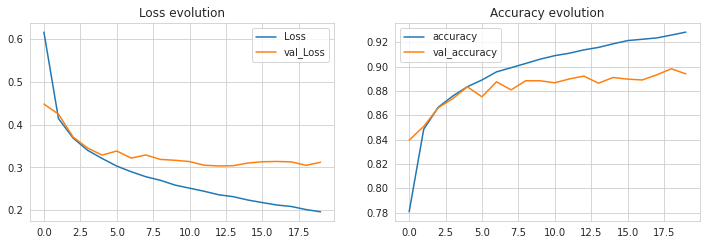

In [ ]:
#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Model1hist.history['loss'], label='Loss')
plt.plot(Model1hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(Model1hist.history['accuracy'], label='accuracy')
plt.plot(Model1hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')


test_loss2, test_accuracy2 = Model1.evaluate(x_test, y_test, verbose=0)
print('Testloss= ',test_loss2,'  TestAccuracy= ',test_accuracy2)

In [ ]:
Model2= Sequential()
Model2.add(Conv2D(32,3,3,input_shape= (28,28,1),activation='relu',padding='same'))
Model2.add(MaxPooling2D(pool_size =(2,2)))

Model2.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
Model2.add(MaxPooling2D(pool_size =(2,2)))

Model2.add(Flatten())
Model2.add(Dense(units= 10,activation='softmax'))

Model2.summary()
Model2.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics =['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 10, 10, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 64)          18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 21,386
Trainable params: 21,386
Non-trainable params: 0
__________________________________________________

Epoch 1/20
1688/1688 - 4s - loss: 0.6319 - accuracy: 0.7741 - val_loss: 0.4561 - val_accuracy: 0.8392
Epoch 2/20
1688/1688 - 3s - loss: 0.4221 - accuracy: 0.8468 - val_loss: 0.4489 - val_accuracy: 0.8418
Epoch 3/20
1688/1688 - 3s - loss: 0.3757 - accuracy: 0.8628 - val_loss: 0.3714 - val_accuracy: 0.8685
Epoch 4/20
1688/1688 - 3s - loss: 0.3461 - accuracy: 0.8741 - val_loss: 0.3680 - val_accuracy: 0.8672
Epoch 5/20
1688/1688 - 3s - loss: 0.3269 - accuracy: 0.8818 - val_loss: 0.3540 - val_accuracy: 0.8723
Epoch 6/20
1688/1688 - 3s - loss: 0.3090 - accuracy: 0.8868 - val_loss: 0.3501 - val_accuracy: 0.8745
Epoch 7/20
1688/1688 - 3s - loss: 0.2955 - accuracy: 0.8929 - val_loss: 0.3369 - val_accuracy: 0.8768
Epoch 8/20
1688/1688 - 3s - loss: 0.2840 - accuracy: 0.8966 - val_loss: 0.3194 - val_accuracy: 0.8857
Epoch 9/20
1688/1688 - 3s - loss: 0.2734 - accuracy: 0.9004 - val_loss: 0.3261 - val_accuracy: 0.8818
Epoch 10/20
1688/1688 - 3s - loss: 0.2646 - accuracy: 0.9027 - val_loss: 0.3203 - 

Text(0.5, 1.0, 'Accuracy evolution')

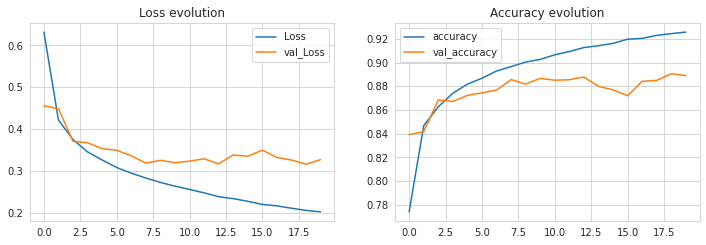

In [ ]:
Model2hist = Model2.fit(x_train, y_train, epochs=20, verbose=2, validation_split = 0.1)

#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Model2hist.history['loss'], label='Loss')
plt.plot(Model2hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(Model2hist.history['accuracy'], label='accuracy')
plt.plot(Model2hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
test_loss, test_accuracy = Model2.evaluate(x_test, y_test, verbose=0)
print(test_loss,test_accuracy)

0.29761072993278503 0.8937000036239624


softmax activation output is much better and both executin time are equal

---



introduce dropout layers and dept of hidden layers

In [ ]:
Model3= Sequential()

Model3.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
Model3.add(MaxPooling2D(pool_size = (2, 2)))
Model3.add(Dropout(0.2))

Model3.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
Model3.add(MaxPooling2D(pool_size = (2, 2)))
Model3.add(Dropout(0.2))

Model3.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
Model3.add(MaxPooling2D(pool_size = (2, 2)))
Model3.add(Dropout(0.2))

Model3.add(Flatten())
Model3.add(Dense(units = 512, activation = 'relu'))
Model3.add(Dropout(0.2))
Model3.add(Dense(units = 10, activation = 'softmax'))


Model3.summary()
Model3.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics =['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 128)        

model 3 with different batch size

Epoch 1/50
422/422 - 4s - loss: 0.8081 - accuracy: 0.6950 - val_loss: 0.5330 - val_accuracy: 0.8085
Epoch 2/50
422/422 - 3s - loss: 0.5375 - accuracy: 0.8032 - val_loss: 0.4476 - val_accuracy: 0.8390
Epoch 3/50
422/422 - 3s - loss: 0.4638 - accuracy: 0.8307 - val_loss: 0.3940 - val_accuracy: 0.8557
Epoch 4/50
422/422 - 3s - loss: 0.4194 - accuracy: 0.8454 - val_loss: 0.3727 - val_accuracy: 0.8622
Epoch 5/50
422/422 - 3s - loss: 0.3935 - accuracy: 0.8555 - val_loss: 0.3439 - val_accuracy: 0.8735
Epoch 6/50
422/422 - 3s - loss: 0.3688 - accuracy: 0.8649 - val_loss: 0.3312 - val_accuracy: 0.8795
Epoch 7/50
422/422 - 3s - loss: 0.3520 - accuracy: 0.8698 - val_loss: 0.3233 - val_accuracy: 0.8798
Epoch 8/50
422/422 - 3s - loss: 0.3411 - accuracy: 0.8733 - val_loss: 0.3183 - val_accuracy: 0.8818
Epoch 9/50
422/422 - 3s - loss: 0.3284 - accuracy: 0.8773 - val_loss: 0.2972 - val_accuracy: 0.8898
Epoch 10/50
422/422 - 3s - loss: 0.3199 - accuracy: 0.8804 - val_loss: 0.2933 - val_accuracy: 0.8917

Text(0.5, 1.0, 'Accuracy evolution')

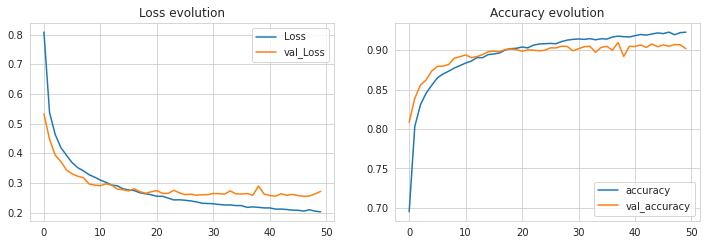

In [ ]:
Model3hist = Model3.fit(x_train, y_train, epochs=50, verbose=2, batch_size=128,validation_split = 0.1)

#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Model3hist.history['loss'], label='Loss')
plt.plot(Model3hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(Model3hist.history['accuracy'], label='accuracy')
plt.plot(Model3hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

batch size 128

In [ ]:
test_loss, test_accuracy = Model3.evaluate(x_test, y_test, verbose=0)
print(test_loss,test_accuracy)

0.2695907950401306 0.9032999873161316


Epoch 1/50
1688/1688 - 8s - loss: 0.6747 - accuracy: 0.7464 - val_loss: 0.4622 - val_accuracy: 0.8295
Epoch 2/50
1688/1688 - 7s - loss: 0.4688 - accuracy: 0.8278 - val_loss: 0.3912 - val_accuracy: 0.8568
Epoch 3/50
1688/1688 - 7s - loss: 0.4139 - accuracy: 0.8461 - val_loss: 0.3458 - val_accuracy: 0.8730
Epoch 4/50
1688/1688 - 7s - loss: 0.3816 - accuracy: 0.8589 - val_loss: 0.3449 - val_accuracy: 0.8718
Epoch 5/50
1688/1688 - 7s - loss: 0.3588 - accuracy: 0.8679 - val_loss: 0.3205 - val_accuracy: 0.8820
Epoch 6/50
1688/1688 - 7s - loss: 0.3473 - accuracy: 0.8709 - val_loss: 0.3269 - val_accuracy: 0.8805
Epoch 7/50
1688/1688 - 7s - loss: 0.3340 - accuracy: 0.8760 - val_loss: 0.3113 - val_accuracy: 0.8832
Epoch 8/50
1688/1688 - 7s - loss: 0.3247 - accuracy: 0.8777 - val_loss: 0.3091 - val_accuracy: 0.8837
Epoch 9/50
1688/1688 - 7s - loss: 0.3189 - accuracy: 0.8811 - val_loss: 0.3035 - val_accuracy: 0.8865
Epoch 10/50
1688/1688 - 7s - loss: 0.3073 - accuracy: 0.8847 - val_loss: 0.2896 - 

Text(0.5, 1.0, 'Accuracy evolution')

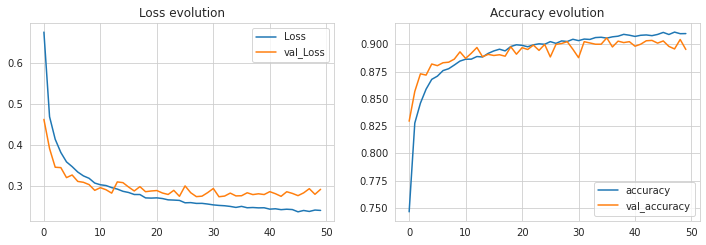

In [ ]:
Model3hist = Model3.fit(x_train, y_train, epochs=50, verbose=2,batch_size=32, validation_split = 0.1)

#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Model3hist.history['loss'], label='Loss')
plt.plot(Model3hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(Model3hist.history['accuracy'], label='accuracy')
plt.plot(Model3hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

'batch size 32'

In [ ]:
test_loss, test_accuracy = Model3.evaluate(x_test, y_test, verbose=0)
print(test_loss,test_accuracy)

0.2679646611213684 0.9018999934196472


batch size 128 is more accurate still can find small overfitting increse drop to 0.25

In [ ]:
Model4= Sequential()

Model4.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
Model4.add(MaxPooling2D(pool_size = (2, 2)))
Model4.add(Dropout(0.25))

Model4.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
Model4.add(MaxPooling2D(pool_size = (2, 2)))
Model4.add(Dropout(0.25))

Model4.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
Model4.add(MaxPooling2D(pool_size = (2, 2)))
Model4.add(Dropout(0.25))

Model4.add(Flatten())
Model4.add(Dense(units = 512, activation = 'relu'))
Model4.add(Dropout(0.25))
Model4.add(Dense(units = 10, activation = 'softmax'))

Model4.summary()
Model4.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics =['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 128)        

Epoch 1/50
422/422 - 4s - loss: 0.8587 - accuracy: 0.6716 - val_loss: 0.5650 - val_accuracy: 0.7865
Epoch 2/50
422/422 - 3s - loss: 0.5678 - accuracy: 0.7910 - val_loss: 0.4787 - val_accuracy: 0.8185
Epoch 3/50
422/422 - 3s - loss: 0.4953 - accuracy: 0.8188 - val_loss: 0.4125 - val_accuracy: 0.8480
Epoch 4/50
422/422 - 3s - loss: 0.4515 - accuracy: 0.8347 - val_loss: 0.3831 - val_accuracy: 0.8590
Epoch 5/50
422/422 - 3s - loss: 0.4209 - accuracy: 0.8448 - val_loss: 0.3543 - val_accuracy: 0.8695
Epoch 6/50
422/422 - 3s - loss: 0.4015 - accuracy: 0.8535 - val_loss: 0.3420 - val_accuracy: 0.8743
Epoch 7/50
422/422 - 3s - loss: 0.3800 - accuracy: 0.8593 - val_loss: 0.3261 - val_accuracy: 0.8767
Epoch 8/50
422/422 - 3s - loss: 0.3682 - accuracy: 0.8644 - val_loss: 0.3230 - val_accuracy: 0.8792
Epoch 9/50
422/422 - 3s - loss: 0.3597 - accuracy: 0.8676 - val_loss: 0.3114 - val_accuracy: 0.8888
Epoch 10/50
422/422 - 3s - loss: 0.3476 - accuracy: 0.8704 - val_loss: 0.3087 - val_accuracy: 0.8838

Text(0.5, 1.0, 'Accuracy evolution')

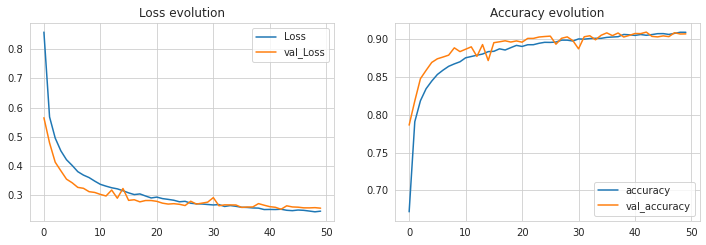

In [ ]:
Model4hist = Model4.fit(x_train, y_train, epochs=50, verbose=2,batch_size=128, validation_split = 0.1)

#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Model4hist.history['loss'], label='Loss')
plt.plot(Model4hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(Model4hist.history['accuracy'], label='accuracy')
plt.plot(Model4hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
test_loss, test_accuracy = Model4.evaluate(x_test, y_test, verbose=0)
print('batch size 128',test_loss,test_accuracy)

batch size 128 0.24187114834785461 0.9106000065803528


This model is quite ok  we will try 200 epochs

Epoch 1/200
422/422 - 4s - loss: 0.8301 - accuracy: 0.6860 - val_loss: 0.5387 - val_accuracy: 0.8010
Epoch 2/200
422/422 - 3s - loss: 0.5482 - accuracy: 0.7978 - val_loss: 0.4601 - val_accuracy: 0.8330
Epoch 3/200
422/422 - 3s - loss: 0.4776 - accuracy: 0.8242 - val_loss: 0.4155 - val_accuracy: 0.8492
Epoch 4/200
422/422 - 3s - loss: 0.4375 - accuracy: 0.8388 - val_loss: 0.3776 - val_accuracy: 0.8585
Epoch 5/200
422/422 - 3s - loss: 0.4075 - accuracy: 0.8514 - val_loss: 0.3578 - val_accuracy: 0.8703
Epoch 6/200
422/422 - 3s - loss: 0.3888 - accuracy: 0.8576 - val_loss: 0.3337 - val_accuracy: 0.8802
Epoch 7/200
422/422 - 3s - loss: 0.3684 - accuracy: 0.8641 - val_loss: 0.3266 - val_accuracy: 0.8810
Epoch 8/200
422/422 - 3s - loss: 0.3557 - accuracy: 0.8680 - val_loss: 0.3183 - val_accuracy: 0.8807
Epoch 9/200
422/422 - 3s - loss: 0.3472 - accuracy: 0.8709 - val_loss: 0.3152 - val_accuracy: 0.8828
Epoch 10/200
422/422 - 3s - loss: 0.3398 - accuracy: 0.8731 - val_loss: 0.2980 - val_accura

Text(0.5, 1.0, 'Accuracy evolution')

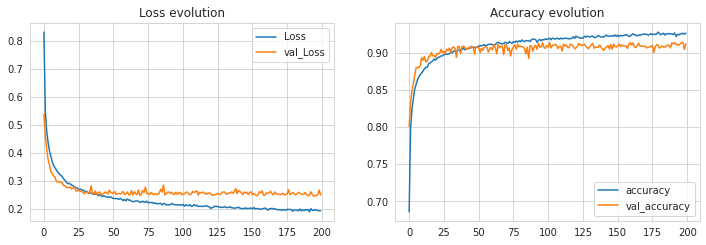

In [ ]:
Model4hist = Model4.fit(x_train, y_train, epochs=200, verbose=2,batch_size=128, validation_split = 0.1)

#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Model4hist.history['loss'], label='Loss')
plt.plot(Model4hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(Model4hist.history['accuracy'], label='accuracy')
plt.plot(Model4hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
test_loss, test_accuracy = Model4.evaluate(x_test, y_test, verbose=0)
print('batch size 128 ,200 epochs',test_loss,test_accuracy)

batch size 128 ,200 epochs 0.24088798463344574 0.9164000153541565


200 epochs are like overfitting.

i will reduce depth of layers again with drop down layer

In [ ]:
Model5= Sequential()

Model5.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
Model5.add(MaxPooling2D(pool_size = (2, 2)))
Model5.add(Dropout(0.25))

Model5.add(Conv2D(64, (3, 3),input_shape = (28,28,1), activation='relu'))
Model5.add(MaxPooling2D(pool_size = (2, 2)))
Model5.add(Dropout(0.25))

Model5.add(Flatten())
Model5.add(Dense(units = 512, activation = 'relu'))
Model5.add(Dropout(0.50))
Model5.add(Dense(units = 10, activation = 'softmax'))

Model5.summary()
Model5.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics =['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1600)            

Epoch 1/50
422/422 - 4s - loss: 0.6173 - accuracy: 0.7744 - val_loss: 0.3961 - val_accuracy: 0.8637
Epoch 2/50
422/422 - 3s - loss: 0.4081 - accuracy: 0.8507 - val_loss: 0.3357 - val_accuracy: 0.8795
Epoch 3/50
422/422 - 3s - loss: 0.3560 - accuracy: 0.8696 - val_loss: 0.3055 - val_accuracy: 0.8892
Epoch 4/50
422/422 - 3s - loss: 0.3239 - accuracy: 0.8807 - val_loss: 0.2883 - val_accuracy: 0.8937
Epoch 5/50
422/422 - 3s - loss: 0.3028 - accuracy: 0.8877 - val_loss: 0.2703 - val_accuracy: 0.9038
Epoch 6/50
422/422 - 3s - loss: 0.2879 - accuracy: 0.8948 - val_loss: 0.2778 - val_accuracy: 0.8985
Epoch 7/50
422/422 - 3s - loss: 0.2726 - accuracy: 0.8985 - val_loss: 0.2635 - val_accuracy: 0.9028
Epoch 8/50
422/422 - 3s - loss: 0.2614 - accuracy: 0.9026 - val_loss: 0.2474 - val_accuracy: 0.9118
Epoch 9/50
422/422 - 3s - loss: 0.2505 - accuracy: 0.9068 - val_loss: 0.2496 - val_accuracy: 0.9102
Epoch 10/50
422/422 - 3s - loss: 0.2452 - accuracy: 0.9073 - val_loss: 0.2353 - val_accuracy: 0.9160

Text(0.5, 1.0, 'Accuracy evolution')

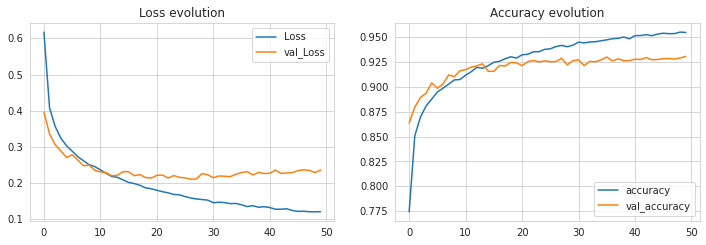

In [ ]:
Model5hist = Model5.fit(x_train, y_train, epochs=50, verbose=2,batch_size=128, validation_split = 0.1)

#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Model5hist.history['loss'], label='Loss')
plt.plot(Model5hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(Model5hist.history['accuracy'], label='accuracy')
plt.plot(Model5hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
test_loss, test_accuracy = Model5.evaluate(x_test, y_test, verbose=0)
print('batch size 128 ,50 epochs,3 layer',test_loss,test_accuracy)

batch size 128 ,50 epochs,3 layer 0.22206318378448486 0.9307000041007996


i am going simply layers more[link text](https://)
\



In [ ]:

Model6= Sequential()

Model6.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
Model6.add(MaxPooling2D(pool_size = (2, 2)))
Model6.add(Dropout(0.25))

Model6.add(Conv2D(64, (3, 3),input_shape = (28,28,1), activation='relu'))
Model6.add(MaxPooling2D(pool_size = (2, 2)))
Model6.add(Dropout(0.25))

Model6.add(Flatten())
Model6.add(Dense(units = 128, activation = 'relu'))
Model6.add(Dropout(0.50))
Model6.add(Dense(units = 10, activation = 'softmax'))

plot(Model6,show_shapes=True)

ImportError: ignored

In [ ]:
Model6.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics =['accuracy'])

Epoch 1/50
422/422 - 34s - loss: 0.7552 - accuracy: 0.7201 - val_loss: 0.4774 - val_accuracy: 0.8207
Epoch 2/50
422/422 - 1s - loss: 0.5014 - accuracy: 0.8156 - val_loss: 0.4005 - val_accuracy: 0.8553
Epoch 3/50
422/422 - 1s - loss: 0.4412 - accuracy: 0.8396 - val_loss: 0.3630 - val_accuracy: 0.8673
Epoch 4/50
422/422 - 1s - loss: 0.4015 - accuracy: 0.8541 - val_loss: 0.3356 - val_accuracy: 0.8805
Epoch 5/50
422/422 - 1s - loss: 0.3784 - accuracy: 0.8619 - val_loss: 0.3126 - val_accuracy: 0.8842
Epoch 6/50
422/422 - 1s - loss: 0.3551 - accuracy: 0.8724 - val_loss: 0.2974 - val_accuracy: 0.8953
Epoch 7/50
422/422 - 1s - loss: 0.3421 - accuracy: 0.8764 - val_loss: 0.2880 - val_accuracy: 0.8970
Epoch 8/50
422/422 - 2s - loss: 0.3291 - accuracy: 0.8811 - val_loss: 0.2813 - val_accuracy: 0.8973
Epoch 9/50
422/422 - 1s - loss: 0.3173 - accuracy: 0.8837 - val_loss: 0.2725 - val_accuracy: 0.9020
Epoch 10/50
422/422 - 1s - loss: 0.3102 - accuracy: 0.8876 - val_loss: 0.2667 - val_accuracy: 0.904

Text(0.5, 1.0, 'Accuracy evolution')

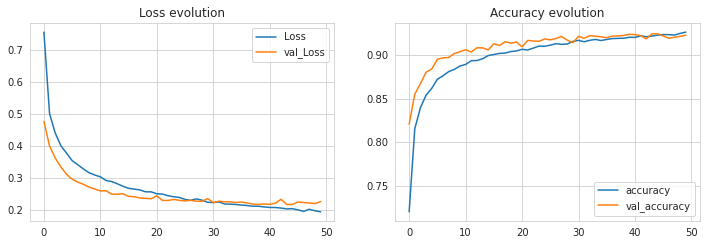

In [ ]:
Model6hist = Model6.fit(x_train, y_train, epochs=50, verbose=2,batch_size=128, validation_split = 0.1)

#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Model6hist.history['loss'], label='Loss')
plt.plot(Model6hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(Model6hist.history['accuracy'], label='accuracy')
plt.plot(Model6hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
test_loss, test_accuracy = Model6.evaluate(x_test, y_test, verbose=0)
print('batch size 128 ,50 epochs,',test_loss,test_accuracy)

batch size 128 ,50 epochs, 0.20539738237857819 0.9272000193595886


It is like a good model. very good accuracy and loss and trainning time


try diffferent loss functions MeanSquaredError, categorical_crossentropy,least-squares

In [ ]:
Model6.compile(loss='mean_absolute_error',optimizer=Adam(lr=0.001),metrics =['accuracy'])

Epoch 1/50
422/422 - 2s - loss: 4.4192 - accuracy: 0.0986 - val_loss: 4.4269 - val_accuracy: 0.0915
Epoch 2/50
422/422 - 2s - loss: 4.4192 - accuracy: 0.0996 - val_loss: 4.4269 - val_accuracy: 0.0917
Epoch 3/50
422/422 - 2s - loss: 4.4192 - accuracy: 0.0985 - val_loss: 4.4269 - val_accuracy: 0.0917
Epoch 4/50
422/422 - 2s - loss: 4.4192 - accuracy: 0.0993 - val_loss: 4.4269 - val_accuracy: 0.0920
Epoch 5/50
422/422 - 2s - loss: 4.4192 - accuracy: 0.0986 - val_loss: 4.4269 - val_accuracy: 0.0923
Epoch 6/50
422/422 - 2s - loss: 4.4192 - accuracy: 0.1004 - val_loss: 4.4269 - val_accuracy: 0.0927
Epoch 7/50
422/422 - 2s - loss: 4.4192 - accuracy: 0.0989 - val_loss: 4.4269 - val_accuracy: 0.0928
Epoch 8/50
422/422 - 2s - loss: 4.4192 - accuracy: 0.0990 - val_loss: 4.4269 - val_accuracy: 0.0930
Epoch 9/50
422/422 - 2s - loss: 4.4192 - accuracy: 0.0984 - val_loss: 4.4269 - val_accuracy: 0.0928
Epoch 10/50
422/422 - 2s - loss: 4.4192 - accuracy: 0.1002 - val_loss: 4.4269 - val_accuracy: 0.0932

Text(0.5, 1.0, 'Accuracy evolution')

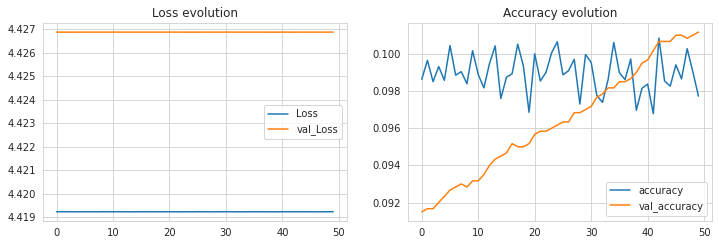

In [ ]:
Model6hist = Model6.fit(x_train, y_train, epochs=50, verbose=2,batch_size=128, validation_split = 0.1)

#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Model6hist.history['loss'], label='Loss')
plt.plot(Model6hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(Model6hist.history['accuracy'], label='accuracy')
plt.plot(Model6hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
test_loss, test_accuracy = Model6.evaluate(x_test, y_test, verbose=0)
print('batch size 128 ,50 ,mean_absolute_error,',test_loss,test_accuracy)

batch size 128 ,50 ,mean_absolute_error, 4.419998645782471 0.10170000046491623


#change activation functons

In [ ]:
Model7= Sequential()

Model7.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
Model7.add(MaxPooling2D(pool_size = (2, 2)))
Model7.add(Dropout(0.25))

Model7.add(Conv2D(64, (3, 3),input_shape = (28,28,1), activation='relu'))
Model7.add(MaxPooling2D(pool_size = (2, 2)))
Model7.add(Dropout(0.25))

Model7.add(Flatten())
Model7.add(Dense(units = 128, activation = 'relu'))
Model7.add(Dropout(0.50))
Model7.add(Dense(units = 10, activation = 'sigmoid'))

Model7.summary()

Model7.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics =['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)            

Epoch 1/50
422/422 - 2s - loss: 0.7186 - accuracy: 0.7341 - val_loss: 0.4373 - val_accuracy: 0.8428
Epoch 2/50
422/422 - 1s - loss: 0.4653 - accuracy: 0.8320 - val_loss: 0.3741 - val_accuracy: 0.8637
Epoch 3/50
422/422 - 1s - loss: 0.4130 - accuracy: 0.8535 - val_loss: 0.3319 - val_accuracy: 0.8785
Epoch 4/50
422/422 - 1s - loss: 0.3750 - accuracy: 0.8652 - val_loss: 0.3102 - val_accuracy: 0.8907
Epoch 5/50
422/422 - 2s - loss: 0.3551 - accuracy: 0.8705 - val_loss: 0.2996 - val_accuracy: 0.8953
Epoch 6/50
422/422 - 1s - loss: 0.3360 - accuracy: 0.8796 - val_loss: 0.2953 - val_accuracy: 0.8947
Epoch 7/50
422/422 - 1s - loss: 0.3226 - accuracy: 0.8842 - val_loss: 0.2891 - val_accuracy: 0.8963
Epoch 8/50
422/422 - 1s - loss: 0.3115 - accuracy: 0.8885 - val_loss: 0.2809 - val_accuracy: 0.8940
Epoch 9/50
422/422 - 1s - loss: 0.3026 - accuracy: 0.8909 - val_loss: 0.2636 - val_accuracy: 0.9063
Epoch 10/50
422/422 - 1s - loss: 0.2920 - accuracy: 0.8927 - val_loss: 0.2577 - val_accuracy: 0.9107

Text(0.5, 1.0, 'Accuracy evolution')

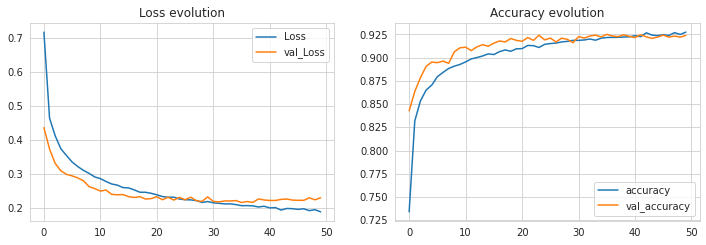

In [ ]:
Model7hist = Model7.fit(x_train, y_train, epochs=50, verbose=2,batch_size=128, validation_split = 0.1)

#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Model7hist.history['loss'], label='Loss')
plt.plot(Model7hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(Model7hist.history['accuracy'], label='accuracy')
plt.plot(Model7hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
test_loss, test_accuracy = Model7.evaluate(x_test, y_test, verbose=0)
print('batch size 128 ,50 ,relu and softmax activation,',test_loss,test_accuracy)

batch size 128 ,50 ,relu and softmax activation, 0.20439887046813965 0.9287999868392944


relu and soft max ,relu sigmod combination are nearly same.
i will try with different optimizer

In [ ]:
Model8= Sequential()

Model8.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
Model8.add(MaxPooling2D(pool_size = (2, 2)))
Model8.add(Dropout(0.25))

Model8.add(Conv2D(64, (3, 3),input_shape = (28,28,1), activation='relu'))
Model8.add(MaxPooling2D(pool_size = (2, 2)))
Model8.add(Dropout(0.25))

Model8.add(Flatten())
Model8.add(Dense(units = 128, activation = 'relu'))
Model8.add(Dropout(0.50))
Model8.add(Dense(units = 10, activation = 'softmax'))

Model8.summary()
opt = tf.keras.optimizers.RMSprop()
optimizer = keras.optimizers.SGD()
Model8.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics =['accuracy'])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1600)            

Epoch 1/50
422/422 - 2s - loss: 0.7706 - accuracy: 0.7144 - val_loss: 0.4736 - val_accuracy: 0.8253
Epoch 2/50
422/422 - 1s - loss: 0.5026 - accuracy: 0.8159 - val_loss: 0.3910 - val_accuracy: 0.8630
Epoch 3/50
422/422 - 2s - loss: 0.4448 - accuracy: 0.8388 - val_loss: 0.3578 - val_accuracy: 0.8747
Epoch 4/50
422/422 - 2s - loss: 0.4075 - accuracy: 0.8524 - val_loss: 0.3366 - val_accuracy: 0.8800
Epoch 5/50
422/422 - 1s - loss: 0.3811 - accuracy: 0.8606 - val_loss: 0.3190 - val_accuracy: 0.8815
Epoch 6/50
422/422 - 2s - loss: 0.3632 - accuracy: 0.8694 - val_loss: 0.3044 - val_accuracy: 0.8858
Epoch 7/50
422/422 - 1s - loss: 0.3487 - accuracy: 0.8741 - val_loss: 0.2922 - val_accuracy: 0.8950
Epoch 8/50
422/422 - 2s - loss: 0.3329 - accuracy: 0.8784 - val_loss: 0.2883 - val_accuracy: 0.8972
Epoch 9/50
422/422 - 2s - loss: 0.3235 - accuracy: 0.8826 - val_loss: 0.2709 - val_accuracy: 0.8983
Epoch 10/50
422/422 - 2s - loss: 0.3161 - accuracy: 0.8852 - val_loss: 0.2618 - val_accuracy: 0.9032

Text(0.5, 1.0, 'Accuracy evolution')

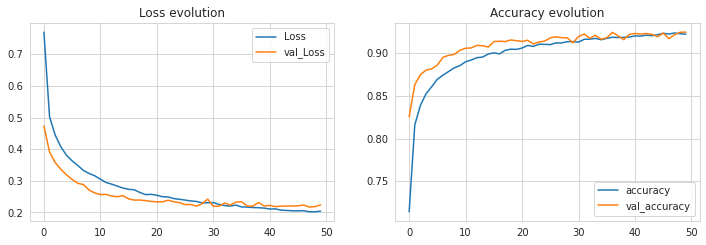

In [ ]:
Model8hist = Model8.fit(x_train, y_train, epochs=50, verbose=2,batch_size=128, validation_split = 0.1)

#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Model8hist.history['loss'], label='Loss')
plt.plot(Model8hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(Model8hist.history['accuracy'], label='accuracy')
plt.plot(Model8hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
test_loss, test_accuracy = Model8.evaluate(x_test, y_test, verbose=0)
print('batch size 128 ,50 optimizer=AdAM,',test_loss,test_accuracy)

batch size 128 ,50 optimizer=AdAM, 0.21011850237846375 0.9246000051498413


in these optimizers adam is good for this model i will go with adam and try different learning rate

In [ ]:
Model9= Sequential()

Model9.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
Model9.add(MaxPooling2D(pool_size = (2, 2)))
Model9.add(Dropout(0.25))

Model9.add(Conv2D(64, (3, 3),input_shape = (28,28,1), activation='relu'))
Model9.add(MaxPooling2D(pool_size = (2, 2)))
Model9.add(Dropout(0.25))

Model9.add(Flatten())
Model9.add(Dense(units = 128, activation = 'relu'))
Model9.add(Dropout(0.50))
Model9.add(Dense(units = 10, activation = 'sigmoid'))

Model9.summary()

Model9.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics =['accuracy'])

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 1600)            

Epoch 1/50
422/422 - 2s - loss: 0.7411 - accuracy: 0.7282 - val_loss: 0.4669 - val_accuracy: 0.8307
Epoch 2/50
422/422 - 1s - loss: 0.4858 - accuracy: 0.8228 - val_loss: 0.3905 - val_accuracy: 0.8608
Epoch 3/50
422/422 - 2s - loss: 0.4249 - accuracy: 0.8465 - val_loss: 0.3384 - val_accuracy: 0.8778
Epoch 4/50
422/422 - 2s - loss: 0.3858 - accuracy: 0.8621 - val_loss: 0.3247 - val_accuracy: 0.8838
Epoch 5/50
422/422 - 2s - loss: 0.3652 - accuracy: 0.8658 - val_loss: 0.3112 - val_accuracy: 0.8883
Epoch 6/50
422/422 - 1s - loss: 0.3460 - accuracy: 0.8755 - val_loss: 0.3041 - val_accuracy: 0.8913
Epoch 7/50
422/422 - 2s - loss: 0.3272 - accuracy: 0.8820 - val_loss: 0.2789 - val_accuracy: 0.9012
Epoch 8/50
422/422 - 2s - loss: 0.3186 - accuracy: 0.8834 - val_loss: 0.2736 - val_accuracy: 0.9013
Epoch 9/50
422/422 - 2s - loss: 0.3055 - accuracy: 0.8889 - val_loss: 0.2777 - val_accuracy: 0.8972
Epoch 10/50
422/422 - 1s - loss: 0.2968 - accuracy: 0.8913 - val_loss: 0.2605 - val_accuracy: 0.9070

Text(0.5, 1.0, 'Accuracy evolution')

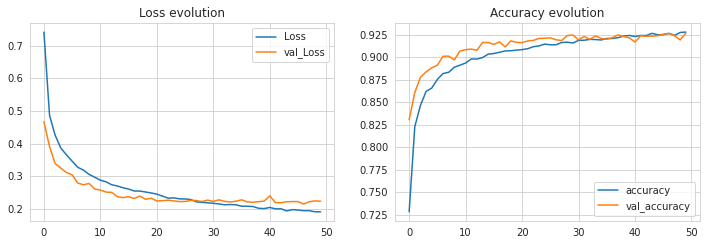

In [ ]:
Model9hist = Model9.fit(x_train, y_train, epochs=50, verbose=2,batch_size=128, validation_split = 0.1)

#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(Model9hist.history['loss'], label='Loss')
plt.plot(Model9hist.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(Model9hist.history['accuracy'], label='accuracy')
plt.plot(Model9hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
test_loss, test_accuracy = Model9.evaluate(x_test, y_test, verbose=0)
print('batch size 128 ,50 optimizer=AdAM(lr=0.001),sigmoid',test_loss,test_accuracy)

batch size 128 ,50 optimizer=AdAM(lr=0.001),sigmoid 0.19307060539722443 0.9302999973297119


adam with lr0.001 is quite good learning rate
so this model is goood one for this classification problem

In [ ]:
clf.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [ ]:
history1 = clf.fit(x_train, y_train, epochs=20, verbose=2, validation_split = 0.1)

In [ ]:
clf1= Sequential()
clf1.add(Conv2D(32,3,3,input_shape= (28,28,1),activation='relu'))
clf1.add(MaxPooling2D(pool_size =(2,2)))
clf1.add(Flatten())
clf1.add(Dense(units= 32,activation='relu'))
clf1.add(Dense(units= 10,activation='sigmoid'))

clf1.summary()

In [ ]:
clf1.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [ ]:
history2 = clf1.fit(x_trainnor, y_train, epochs=20, verbose=2, validation_split = 0.1)

In [ ]:
#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history1.history['loss'], label='Loss')
plt.plot(history1.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
test_loss1, test_accuracy1 = clf.evaluate(x_test, y_test, verbose=0)
print(test_loss1,test_accuracy1)

In [ ]:
test_loss2, test_accuracy2 = clf1.evaluate(x_test, y_test, verbose=0)
print(test_loss2,test_accuracy2)

First model

In [ ]:
clf1.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics =['accuracy'])